In [1]:
from matplotlib import pyplot as plt
import random
import seaborn as sns
import pandas as pd
# Библиотека numpy используется только для оптимизации работы с массивами, все статистические функции написаны самостоятельно
import numpy as np

In [2]:
class Linear_regression():
    
    def __init__(self, dfx, dfy):
        self.name_x = list(dfx) 
        self.name_y = dfy.name
        self.x = [dfx[i].to_numpy() for i in dfx]
        self.y = y.to_numpy()
        self.k = []
        self.b = []
        self.method = 'Gradient'
        self.mk = []
        self.mb = []
        pass
    
# Эта функция считает среднее значение
    def mean(m):
        return sum(m)/len(m)

# Эта функцция считает дисперсию
    def disp(self, m):
        mean = Linear_regression.mean(m)
        disp = 0
        for i in m:
            disp += (mean-i)**2
        disp /= len(m) - 1
        return disp
        
# Эта функцция считает среднеквадратическое отлонение
    def stdev(self, m):
        return Linear_regression.disp(self, m)**(1/2)
        
# Эта функция считает ковариацию
    def cov(self, m1 = [], m2 = []):
        mean_m1 = Linear_regression.mean(m1)
        mean_m2 = Linear_regression.mean(m2)
        cov = 0
        for i in range(len(m1)):
            cov += (mean_m1 - m1[i])*(mean_m2 - m2[i])
        cov /= (len(m1) - 1)
        return cov

# Эта функция считает корреляцию
    def cor(self, m1 = [], m2 = []):
        stdev_m1 = Linear_regression.stdev(self, m1)
        stdev_m2 = Linear_regression.stdev(self, m2)
        cor = stdev_m1 = Linear_regression.cov(self, m1, m2)/(stdev_m1 * stdev_m2)
        return cor

# Стандартная формула для построения регрессионной прямой вида y = kx + b:
# k = (среднеквадротическое отклонение целевой переменной/среднеквадротическое отклонние признака) * их корреляция
# b = среднее значение целевой переменной/(среднее значение признака * b1)
    def formula(self, x, y):
        mean_x = Linear_regression.mean(x)
        mean_y = Linear_regression.mean(y)
        stdev_x = Linear_regression.stdev(self, x)
        stdev_y = Linear_regression.stdev(self, y)
        cor = Linear_regression.cor(self, x, y)
        k = (stdev_y/stdev_x) * cor
        b = mean_y - mean_x * k
        return [k], [b]

# Функкция потерь суммы квадратов ошшибок:
# L = (1/n)∑(y-(b + k * x))^2
    def square_error(self, k, b):
        x = self.x
        y = self.y
        errors = 0
        for i in range(len(x)):
            for j in range(len(x[i])):
                errors += (y[j] - k * x[i][j] - b)**2
        return errors

# Функция обучения модели, которая считает коэффициенты для линейной регрессии двумя способами:
# Градиентным спуском и формулой, которая представлена ранее, но при суловии, признак всего один.
# Метод градиентного спуска реализован следующим образом: 
# берется производная по функции потерь, которая представлена ранее: L = (y'-(b + k * x + ki * xi + ...))^2
# частная производная по dL/dk = Σ(-2 * xi * (y - b0 - b1 * x) * alpha1
# частная производная по dL/db = Σ(-2 * (y - b0 - b1 * x) * alpha1
# частные производные будут указывать на направление и скорость изменения коэффициентов k и b
    def fit(self, train_x, train_y, max_iterations = 10000, gradient = 0.1, method='Gradient'):
        if len(train_x) == 1:
            if method == 'Formula':
                k,b = Linear_regression.formula(self, train_x[0], train_y) 
            elif method == 'Gradient':   
                k,b = [0],[0]
                a1 = 1/(Linear_regression.disp(self,train_x[0]) * Linear_regression.disp(self,train_y) * len(train_y))
                a2 = a1 * Linear_regression.stdev(self, train_y) 
                gradient_k,gradient_b = 0,0
                mk = []
                mb = []
                for i in range(max_iterations):
                    gradient_k = np.sum(-2 * train_x[0] * (train_y - k[0] * train_x[0] - b[0]))
                    gradient_b = np.sum(-2 * (train_y - k[0] * train_x[0] - b[0]))
                    k[0] -= gradient_k * a1
                    b[0] -= gradient_b * a2
                    mk.append(k[0])
                    mb.append(b[0])
                    if abs(gradient_k) < gradient and abs(gradient_b) < gradient and i >1:
                        break
                self.mk = mk
                self.mb = mb
        else:
            k = [0 for i in range(len(x))]
            b = [0 for i in range(len(x))]
            a = []
            gradient_k = np.array([0 for i in range(len(x))], dtype=np.int64)
            gradient_b = np.array([0 for i in range(len(x))], dtype=np.int64)
            
            for i in train_x:
                a.append(abs(Linear_regression.cor(self, i, train_y))/(Linear_regression.stdev(self,i) * Linear_regression.stdev(self,train_y) * len(train_y)))
            for i in range(max_iterations):
                for j in range(len(train_x)):
                    gradient_k[j] = np.sum(-2 * train_x[j] * (train_y - k[j] * train_x[j] - b[j]))
                    gradient_b[j] = np.sum(-2 * (train_y - k[j] * train_x[j] - b[j]))
                    k[j] -= (gradient_k[j] / abs(sum(gradient_k))) * a[j]
                    b[j] -= (gradient_b[j] / abs(sum(gradient_b))) * a[j] 
                    if abs(sum(gradient_k)) < gradient and abs(sum(gradient_k)) < gradient:
                        break
        self.method = method
        self.k = k
        self.b = b
                
# Эта функция разбивает выборку на тренировочную и тестовую
    def train_test(self,train,test):
        y = self.y
        x = self.x
        train_x = [[] for i in x]
        train_y = []
        n1 = round(train * len(y))-1
        n2 = round(test * len(y))-1
        n=[]
        mindex = [i for i in range(len(y))]
        for i in range(n1):
            index = random.choice(mindex)
            train_y.append(y[index])
            for j in range(len(x)):
                train_x[j].append(x[j][index])
            mindex.remove(index)
        test_y = [y[index] for index in mindex]
        test_x = [[i[index] for index in mindex] for i in x]
        return np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

# Эта функция предсказывает значения целевой переменной по тестовой выборке
    def predict(self, test_x, test_y):
        k = self.k
        b = self.b
        pred_y = [0 for i in test_y]
        for i in range(len(test_x)):
            for j in range(len(test_x[i])):
                pred_y[j] += test_x[i][j] * k[i] + b[i] 
        return pred_y
        
# Эта функция строит 2D и 3D графики, визуально показывая успешность модели
    def plot(self, test_x, test_y, pred_y):
        k = self.k
        b = self.b
        name_x = self.name_x
        name_y = self.name_y
        sns.set()
        if len(test_x) == 1:
            plt.figure(figsize=[9, 5])
            plt.scatter(test_x[0], test_y, s=50)
            if self.method == 'Gradient':
                plt.plot(test_x[0], [k[0] * i + b[0] for i in test_x[0]], label = 'Градиентныйй спуск', c = 'red')
            elif self.method == 'Formula':
                plt.plot(test_x[0], [k[0] * i + b[0] for i in test_x[0]], label = 'Формула', c = 'orange')
            plt.title('График линейной регрессии по одному признаку')
            plt.ylabel(name_y)
            plt.xlabel(name_x[0])
            plt.legend(loc = 'upper center')
            plt.show()
            if self.method == 'Gradient':
                plt.figure(figsize=[13, 4])
                plt.plot(self.mk)
                plt.title('График изменения коэффициента k от колличества итераций градиентного спуска')
                plt.xlabel('Колличество итераций')
                plt.ylabel('Коэффициент k')
                plt.show()
                plt.figure(figsize=[13, 4])
                plt.plot(self.mb)
                plt.title('График изменения коэффициента b от колличества итераций градиентного спуска')
                plt.xlabel('Колличество итераций')
                plt.ylabel('Коэффициент b')
                plt.show()
            diapazon = range(-1000, 1000, 25)
            ker = [i for i in diapazon for j in diapazon]
            ber = [j for i in diapazon for j in diapazon]
            er = [Linear_regression.square_error(self, ker[i], ber[i]) for i in range(len(ker))]
            fig = plt.figure(figsize=(13,16))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(ker, ber, er, c = er, s = 10)
            if self.method == 'Gradient':
                ax.scatter(k[0], b[0], Linear_regression.square_error(self, k[0], b[0]), c = 'red', label = 'k,b: Градиентный спуск',s = 50)
            elif self.method == 'Formula':
                ax.scatter(k[0], b[0], Linear_regression.square_error(self, k[0], b[0]), c = 'orange', label = 'k,b: Формула',s = 50) 
            plt.xlabel('k')
            plt.ylabel('b')
            plt.title('Плоскость функции потерь L(k,b)')
            plt.legend(loc = 'upper center')
            plt.show()
        else:
            sns.set()
            for i in range(len(test_x)):
                plt.figure(figsize=[9, 5])
                plt.scatter(test_x[i], test_y, s=50, label = name_y)
                plt.scatter(test_x[i], pred_y, s=50, label = "predict {:}".format(name_y), c = 'orange')
                plt.ylabel(name_y)
                plt.xlabel(name_x[i])
                plt.legend(loc = 'upper center')
                plt.show()
            
# За метрику качества модели линейной регрессии выбран коэффициент детерминации
    def determ(self,test_y,pred_y):
        ym = Linear_regression.mean(test_y)
        ch=0
        zn=0        
        for i in range(len(test_y)):
            ch += (test_y[i] - pred_y[i])**2
            zn += (test_y[i] - ym)**2
        det = 1 - ch/zn
        sk_det = 1 - (1- det) * (len(test_y) - 1) / (len(test_y) - len(self.x) - 1)
        otkl = np.sum(abs(pred_y - test_y)/len(test_y))/Linear_regression.mean(test_y)
        if len(self.x) == 1:
            # коэффициент детерминации
            print(f"Данная модель может предсказать {det:.2%} вариации зависимой переменной, Среднее отклонение зависимой переменной от ее предсказанного значения: {otkl:.2%}")      
        else:
            # скорректированный коэффициент детерминации для модели с более чем одним признаком
            print(f"Данная модель может предсказать {sk_det:.2%} вариации зависимой переменной. Среднее отклонение зависимой переменной от ее предсказанного значения: {otkl:.2%}")   
        

In [3]:
data = pd.read_csv('Advertising.csv', index_col=0)
#data = pd.read_csv('Advertising.csv')
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Данный датасет включает в себя колличесвто рекламы по ТВ, радио, газет и соответствующий уровень продаж. Используем на нем модель множественной линейной регрессии, чтобы прдугадать уровень продаж.

Данная модель может предсказать 74.49% вариации зависимой переменной. Среднее отклонение зависимой переменной от ее предсказанного значения: 15.48%


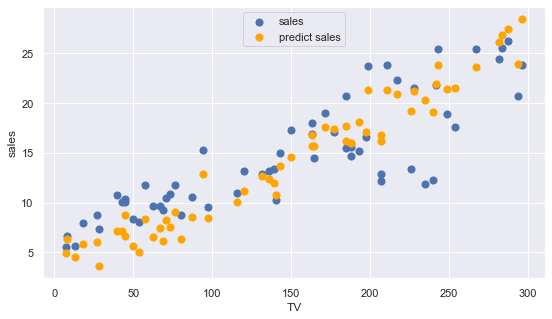

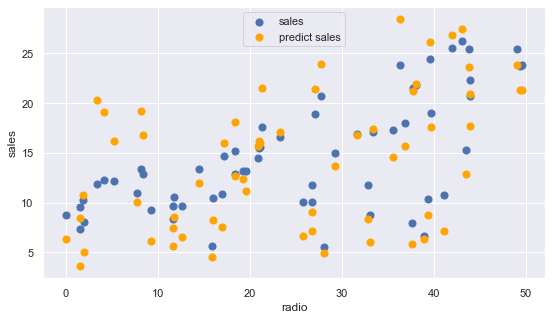

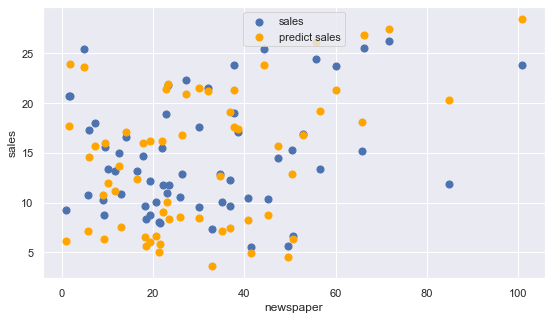

In [4]:
y = data['sales']
x = data.drop(['sales'], axis = 1)
model = Linear_regression(x, y)
train_x, train_y, test_x, test_y = model.train_test(0.7,0.3)
model.fit(train_x, train_y, gradient = 0.1)
pred_y = model.predict(test_x, test_y)
model.determ(test_y, pred_y)
model.square_error
model.plot(test_x, test_y, pred_y)

На мой взгляд данная модель достаточно хорошо описывает дисперсию целевой перменнойю
Теперь протестируем модель линейной регрессии с одним признаком на наборе данных рака молочной железы, 
а за целевую переменную и признак возьмем переменные, которые лучше всего собой коррелируют и напоминают линейную зависимость.

<AxesSubplot:>

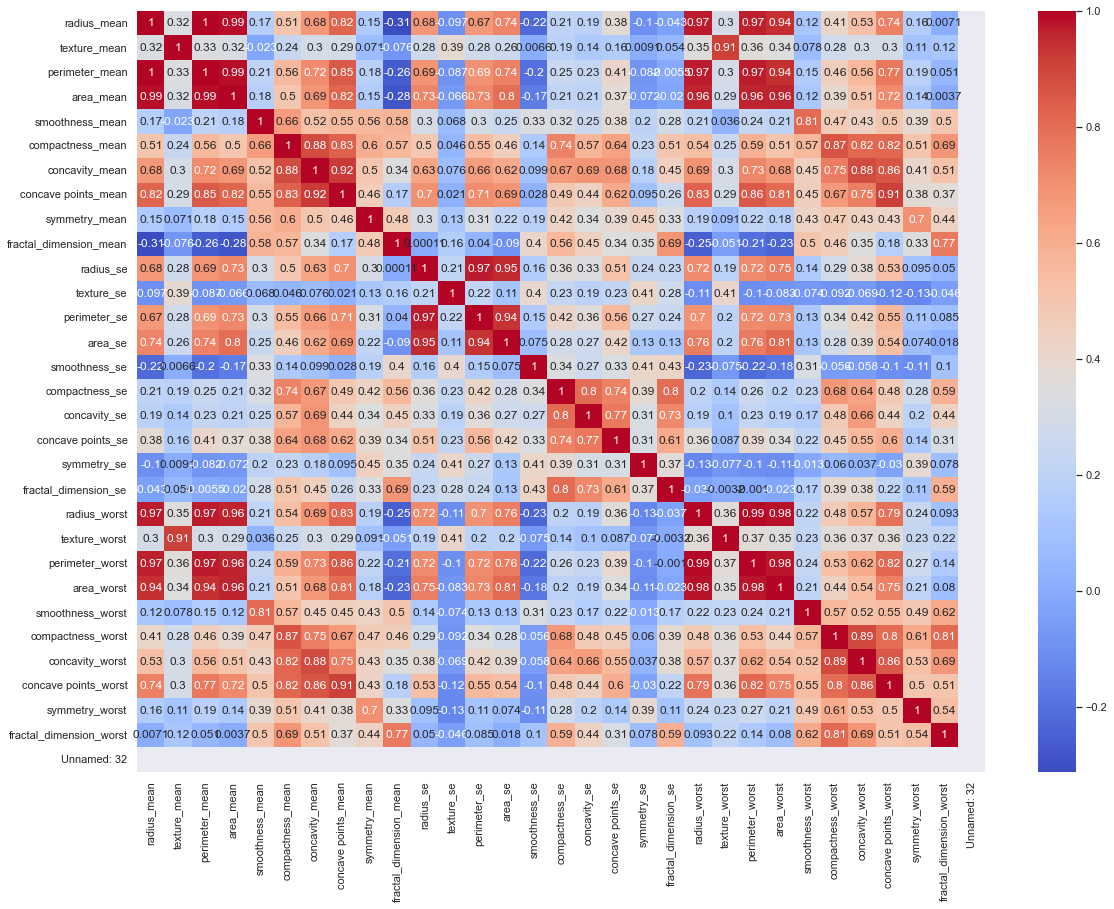

In [5]:
data = pd.read_csv('data.csv', index_col=0)
plt.figure(figsize=(19,14))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Данная модель может предсказать 93.58% вариации зависимой переменной, Среднее отклонение зависимой переменной от ее предсказанного значения: 4.31%


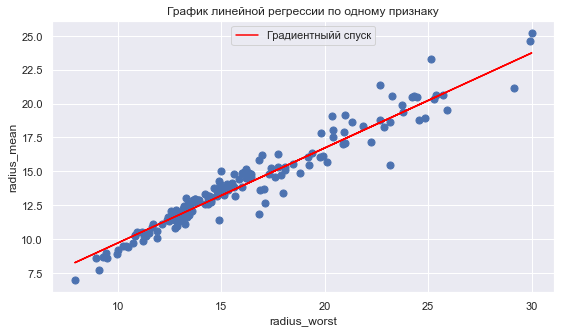

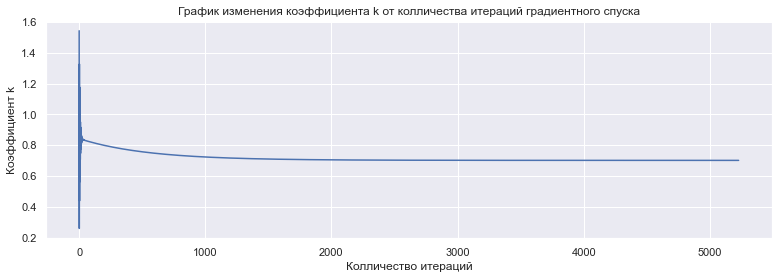

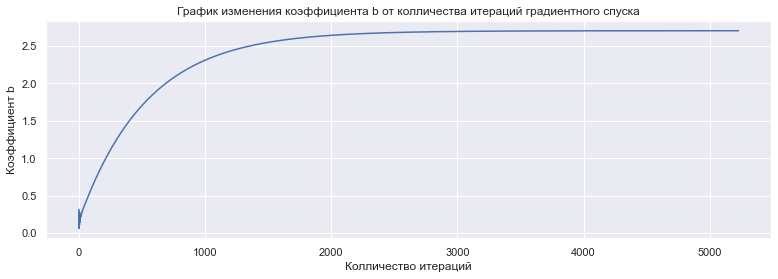

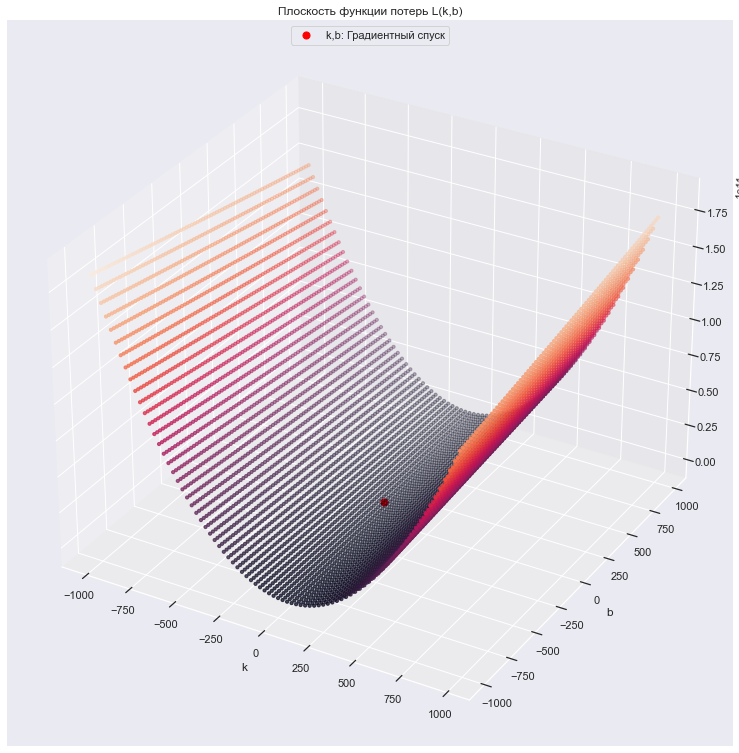

In [6]:
x=pd.DataFrame(data['radius_worst'])
y=data['radius_mean']
model = Linear_regression(x, y)
train_x, train_y, test_x, test_y = model.train_test(0.7,0.3)
model.fit(train_x, train_y, 7000, 0.01, 'Gradient')
pred_y = model.predict(test_x, test_y)
model.determ(test_y, pred_y)
model.plot(test_x, test_y, pred_y)

Данная модель может предсказать 89.57% вариации зависимой переменной, Среднее отклонение зависимой переменной от ее предсказанного значения: 6.08%


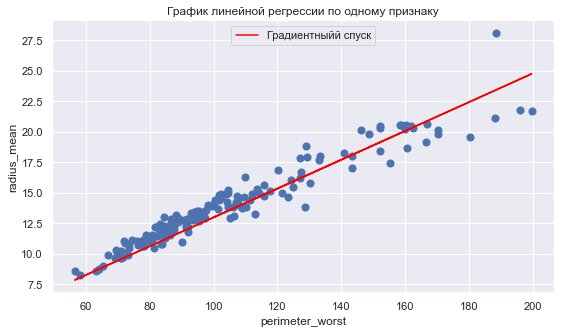

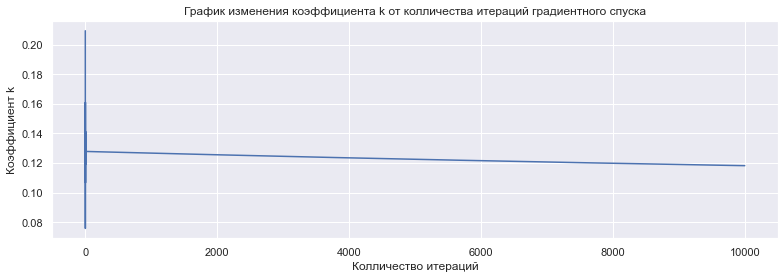

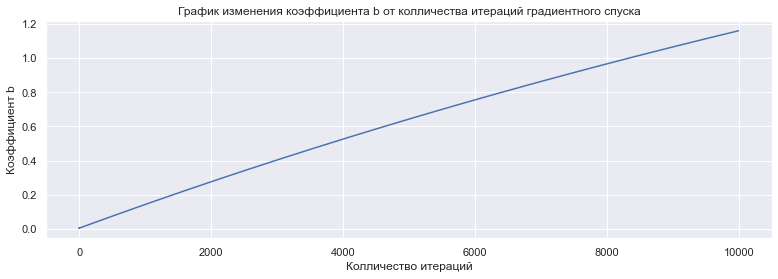

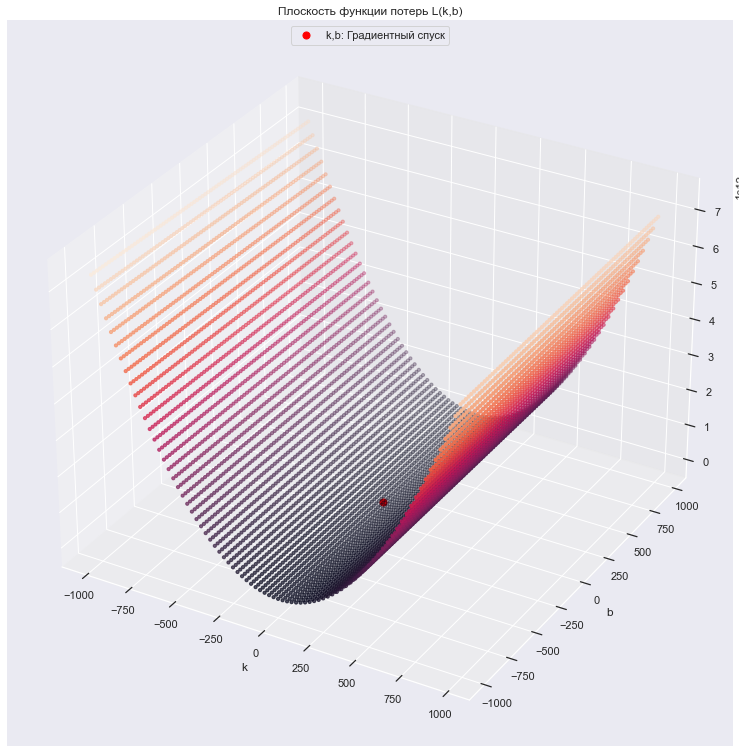

In [9]:
x=pd.DataFrame(data['perimeter_worst'])
y=data['radius_mean']
model = Linear_regression(x, y)
train_x, train_y, test_x, test_y = model.train_test(0.7,0.3)
model.fit(train_x, train_y, gradient =  0.01, method = 'Gradient')
pred_y = model.predict(test_x, test_y)
model.determ(test_y, pred_y)
model.plot(test_x, test_y, pred_y)

Посмотрим на линейную регрессию с коэффициентами k и b, высчитанные с помощью формулы.

Данная модель может предсказать 93.03% вариации зависимой переменной, Среднее отклонение зависимой переменной от ее предсказанного значения: 4.75%


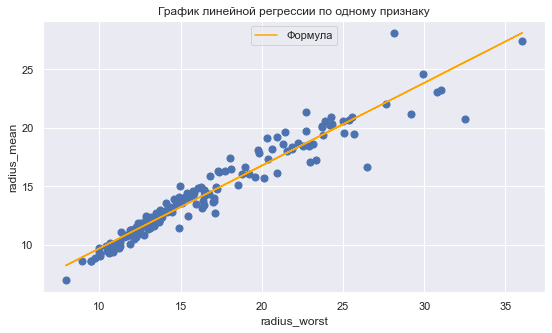

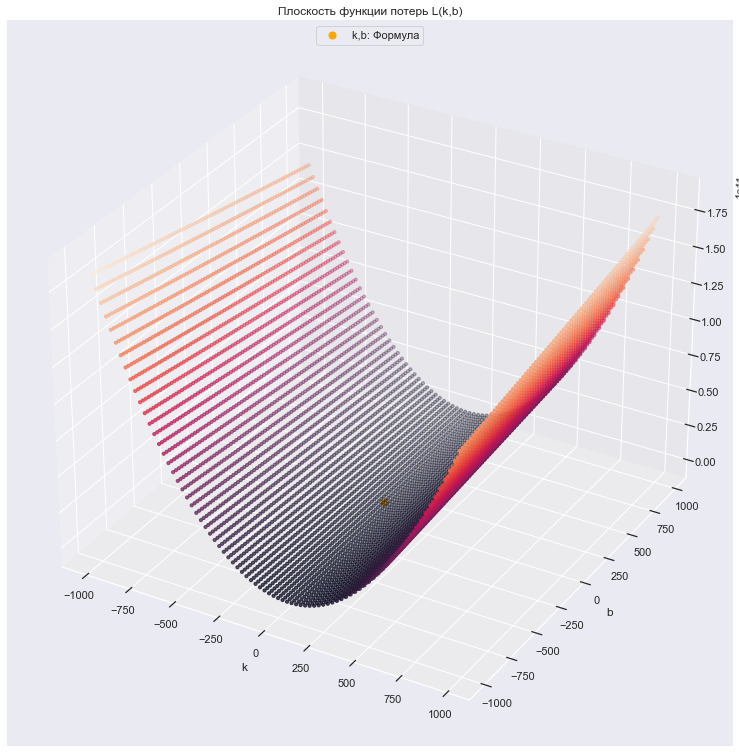

In [10]:
x=pd.DataFrame(data['radius_worst'])
y=data['radius_mean']
model = Linear_regression(x, y)
train_x, train_y, test_x, test_y = model.train_test(0.7,0.3)
model.fit(train_x, train_y, method = 'Formula')
pred_y = model.predict(test_x, test_y)
model.determ(test_y, pred_y)
model.plot(test_x, test_y, pred_y)

Данная модель может предсказать 92.46% вариации зависимой переменной, Среднее отклонение зависимой переменной от ее предсказанного значения: 4.90%


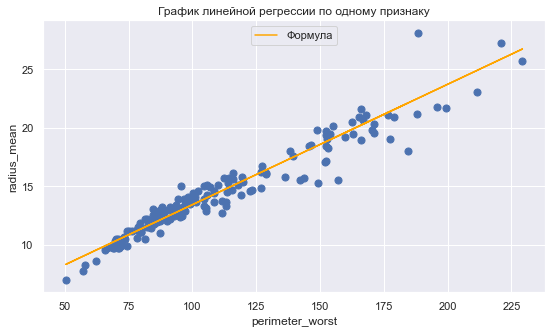

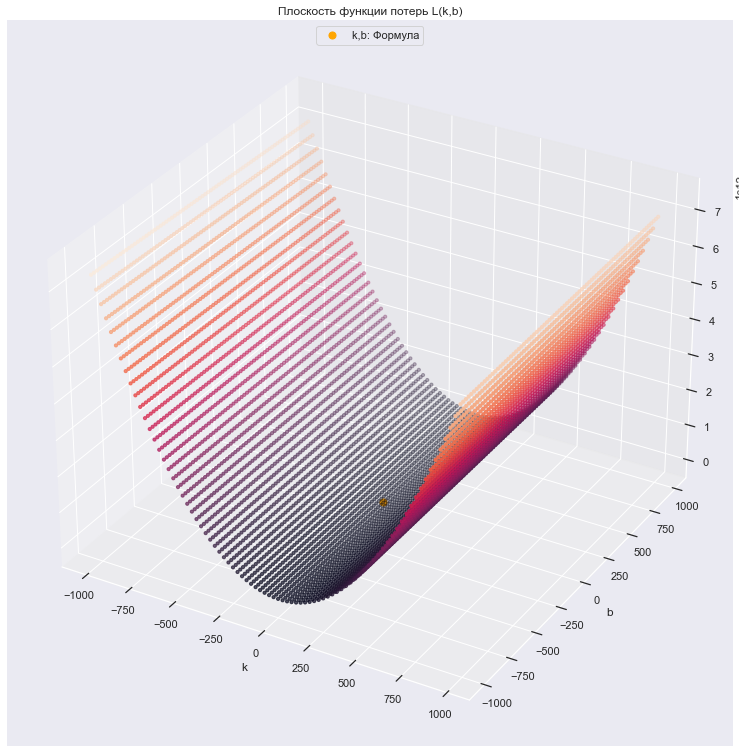

In [11]:
x=pd.DataFrame(data['perimeter_worst'])
y=data['radius_mean']
model = Linear_regression(x, y)
train_x, train_y, test_x, test_y = model.train_test(0.7,0.3)
model.fit(train_x, train_y, method = 'Formula')
pred_y = model.predict(test_x, test_y)
model.determ(test_y, pred_y)
model.plot(test_x, test_y, pred_y)

Из данных графиков можно сделать вывод: оба метода вычисления коэффициентов k и b проявили себя хорошо, но когда всего один признак, можно не прибегать к столь сложному и затратному методу
градиентного спуска, а просто воспользоваться формулой.